## Aggregating conversations

In [171]:
import json
import glob
import os
import zipfile
import pandas as pd
from collections import Counter, OrderedDict

chat_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1a-submissions"
dir_list = os.listdir(chat_folder)
all_conversations = []
# for file in glob.glob(chat_folder + '/*.zip'):
#     with zipfile.ZipFile(file) as myzip:
#         for filename in myzip.namelist():
#             if filename.endswith('.json'):
#                 f = myzip.open(filename)
#                 try:
#                     print(filename)
#                     d = json.load(f)
#                     all_conversations.extend(d)
#                 except:
#                     print(filename)

print('Nr of json files', len(glob.glob(chat_folder + '/*.json')))
for filename in glob.glob(chat_folder + '/*.json'):
    with open(filename) as f:
        try:
            index = filename.rfind("/")
            print(filename[index:])
            speakers = []
            d = json.load(f)
            for turn in d:
                if 'speaker' in turn:
                    speakers.append(turn['speaker'])
            print(Counter(speakers))
            print()
            all_conversations.extend(d)
        except:
            print(filename)

Nr of json files 26
/dekker_human_Dana_chat_with_qwen30.6b.json
Counter({'AI': 11, 'Dana': 10, 'Human': 1})

/langeberg_human_Ada1_chat_with_qwen3_0_6b.json
Counter({'AI': 28, 'Ada1': 27, 'Human': 1})

/rostanzom_314593_9455844_human_Ada2_chat_with_qwen30.6b.json
Counter({'AI': 20, 'Ada2': 19, 'Human': 1})

/sapienza_human_Woland_chat_with_qwen3:0.6b.json
Counter({'AI': 21, 'Woland': 20, 'Human': 1})

/javadi_human_Nymera_Vaelith_chat_with_qwen30.6b.json
Counter({'AI': 21, 'Nymera Vaelith': 20, 'Human': 1})

/popa_human_Star._chat_with_qwen30.6b.json
Counter({'AI': 26, 'Star.': 25, 'Human': 1})

/kat_245802_9450266_lab1_conversation_Pink_qwen3_0_6b.json
Counter({'AI': 20, 'Pink': 19, 'Human': 1})

/altgaSen_human_Maria1_chat_with_qwen3_latest.json
Counter({'AI': 31, 'Maria1': 19, 'Paul': 11, 'Human': 1})

/manu_human_Jake_chat_with_qwen31.7b.json
Counter({'AI': 22, 'Jake': 21, 'Human': 1})

/attar_human_Martin_chat_with_qwen30.6b.json
Counter({'AI': 21, 'Martin': 20, 'Human': 1})

/mas

In [172]:
print('Total number of turns', len(all_conversations))

Total number of turns 1326


In [173]:
all_file = "all_conversations.json"
with open(all_file,'w') as file:
    json.dump(all_conversations, file, indent = 4)

## Data statistics

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_labels_with_counts(labels, values):
    total = 0
    for v in values:
        total+=v
    print('Total of values', total)
    ax = sns.barplot(x=labels, y=values)
    #rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
    # Add values above bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, str(int((v/total*100)))+'%', ha='center')
    plt.show()

In [175]:
df = pd.read_json("all_conversations.json")
#df.info()
#df.head()

Speaker values 30

OrderedDict([('Ada1', 27), ('Ada2', 19), ('Bill', 20), ('Bizmuth', 19), ('Brenda', 24), ('Carla', 27), ('Dana', 10), ('Dean', 25), ('Friday', 20), ('Gale', 24), ('Gino', 13), ('Jackson', 29), ('Jake', 21), ('Jason', 15), ('Joe', 23), ('Lennart', 42), ('Lina ', 21), ('Louise', 20), ('Marco', 20), ('Maria1', 19), ('Maria2', 19), ('Martin', 20), ('Max', 26), ('Ms. Potts', 21), ('Nymera Vaelith', 20), ('Oek', 20), ('Paul', 11), ('Pink', 19), ('Star.', 25), ('Woland', 20)])
Total of values 639


/var/folders/6w/bw7dqbl9727c48pcjjh32r140000gn/T/ipykernel_97217/3975403035.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


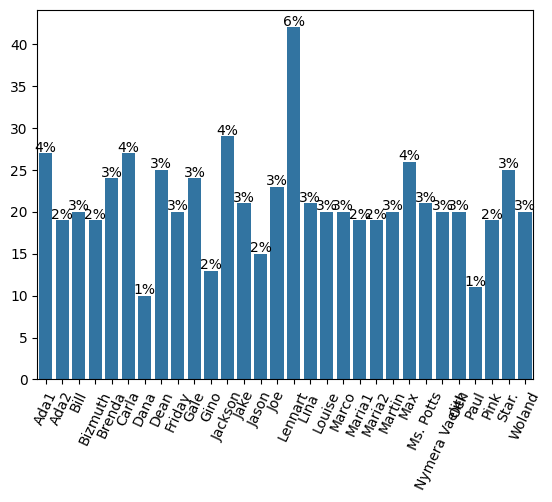

In [176]:
speakers = []
for s in df['speaker']:
    if not s=='AI' and not s=="Human":
        speakers.append(s)
print('Speaker values', len(set(speakers)))
print()
counts = Counter(speakers)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

## Adding friends to personas

In [177]:
persona_and_friends = {}


for persona in counts_sorted:
    persona_and_friends[persona]=[]

persona1 = ""
persona2 = ""
for index, persona in enumerate(counts_sorted):
    if index==0:
        persona1 = persona
    elif index==1:
        persona2 = persona
    friends = persona_and_friends.get(persona)
    ### hack due to multiple persona per JSON, 2025
    if persona == "Maria1":
        friends.append("Paul")
    if persona == "Lennart":
        friends.append("Dean")
        friends.append("Jason")
    if persona == "Joe":
        friends.append("Bill")
#    if persona in ["Bill", "Dean", "Jason", "Paul"]:
#        continue
    if index+1 == len(counts_sorted):
        friends = [persona1, persona2]
    elif index+2 == len(counts_sorted):
        friends = [persona1]
    friend_index = index+1
    for persona_next in list(counts_sorted)[friend_index:]:
        if not(persona_next in friends) and len(friends)<2:
            friends.append(persona_next)
    persona_and_friends[persona]=friends

for persona in persona_and_friends:
    friends = persona_and_friends.get(persona)
    count = counts_sorted.get(persona)
    friends_counts = 0
    for friend in friends:
        friends_counts += counts_sorted.get(friend)
    print(persona, "\t", count, "\t", friends, "\t", count+friends_counts)


Ada1 	 27 	 ['Ada2', 'Bill'] 	 66
Ada2 	 19 	 ['Bill', 'Bizmuth'] 	 58
Bill 	 20 	 ['Bizmuth', 'Brenda'] 	 63
Bizmuth 	 19 	 ['Brenda', 'Carla'] 	 70
Brenda 	 24 	 ['Carla', 'Dana'] 	 61
Carla 	 27 	 ['Dana', 'Dean'] 	 62
Dana 	 10 	 ['Dean', 'Friday'] 	 55
Dean 	 25 	 ['Friday', 'Gale'] 	 69
Friday 	 20 	 ['Gale', 'Gino'] 	 57
Gale 	 24 	 ['Gino', 'Jackson'] 	 66
Gino 	 13 	 ['Jackson', 'Jake'] 	 63
Jackson 	 29 	 ['Jake', 'Jason'] 	 65
Jake 	 21 	 ['Jason', 'Joe'] 	 59
Jason 	 15 	 ['Joe', 'Lennart'] 	 80
Joe 	 23 	 ['Bill', 'Lennart'] 	 85
Lennart 	 42 	 ['Dean', 'Jason'] 	 82
Lina  	 21 	 ['Louise', 'Marco'] 	 61
Louise 	 20 	 ['Marco', 'Maria1'] 	 59
Marco 	 20 	 ['Maria1', 'Maria2'] 	 58
Maria1 	 19 	 ['Paul', 'Maria2'] 	 49
Maria2 	 19 	 ['Martin', 'Max'] 	 65
Martin 	 20 	 ['Max', 'Ms. Potts'] 	 67
Max 	 26 	 ['Ms. Potts', 'Nymera Vaelith'] 	 67
Ms. Potts 	 21 	 ['Nymera Vaelith', 'Oek'] 	 61
Nymera Vaelith 	 20 	 ['Oek', 'Paul'] 	 51
Oek 	 20 	 ['Paul', 'Pink'] 	 50
Paul 	 11 

## Saving personas and friends

In [178]:
persona_and_friends_file = "persona_and_friends.json"
with open(persona_and_friends_file,'w') as file:
    json.dump(persona_and_friends, file, indent = 4)

## Creating annotation files for each persona

In [179]:
def get_speaker(d:dict):
    speaker = ""
    max_speaker = 0
    speaker_count = {}
    for item in d:
        speaker_key = item["speaker"]
        if not speaker_key=="AI":
            if speaker_key in speaker_count:
                speaker_count[speaker_key] += 1
            else:
                speaker_count[speaker_key] = 1
    for s, count in speaker_count.items():
        if count > max_speaker:
            speaker = s
            max_speaker = count
    return speaker

In [180]:
def get_speakers(d:dict):
    speakers = []
    for item in d:
        speaker = item["speaker"]
        if not speaker=="AI" and not speaker=="Human":
            if not speaker in speakers:
                speakers.append(speaker)
    return speakers

In [199]:
import json
import glob
import zipfile
#import pandas as pd

speaker_dict = {}
for filename in glob.glob(chat_folder + '/*.json'):
    with open(filename) as f:
       # print(filename)
        d = json.load(f)
        speakers = get_speakers(d)
        for speaker in speakers:
            if speaker in speaker_dict:
                speaker_dict[speaker].append(d)
            else:
                speaker_dict[speaker] = [d]

for speaker in speaker_dict:
    print(speaker, len(speaker_dict[speaker]))

Dana 1
Ada1 1
Ada2 1
Woland 1
Nymera Vaelith 1
Star. 1
Pink 1
Paul 1
Maria1 1
Jake 1
Martin 1
Gino 1
Jackson 1
Ms. Potts 1
Gale 1
Jason 1
Dean 1
Lennart 1
Bizmuth 1
Louise 1
Carla 1
Maria2 1
Friday 1
Brenda 1
Lina  1
Marco 1
Max 1
Bill 1
Joe 1
Oek 1


In [182]:
### Speaker check
for persona in persona_and_friends:
    friends = persona_and_friends.get(persona)
    if not persona in speaker_dict:
        print('Cannot find speaker', persona)
    for f in friends:
        if not f in speaker_dict:
            print('Cannot find friend', f)

In [202]:
import pathlib, os
current_working_directory = pathlib.Path.cwd()
folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks"
for persona in persona_and_friends:
    file = os.path.join(current_working_directory, folder, persona+'.json')
    friends = persona_and_friends.get(persona)
    data = {"persona":persona, "friends":friends}
    print(file)
    ### 2025 hack because students submitted multiple persona
    if persona=="Dean" or persona =="Jason" or persona == "Bill" or persona == "Paul":
        annotations = []
    else:
        annotations = speaker_dict[persona]
    for f in friends:
        print(f)
        friend_data = speaker_dict[f]
        annotations.extend(friend_data)
    print(len(annotations))
    data["conversations"]=annotations
    with open(file,'w') as file:
        json.dump(data, file, indent = 4)

/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Ada1.json
Ada2
Bill
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Ada2.json
Bill
Bizmuth
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Bill.json
Bizmuth
Brenda
2
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Bizmuth.json
Brenda
Carla
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Brenda.json
Carla
Dana
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Carla.json
Dana
Dean
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/Dana.json
Dean
Friday
3
/Users/piek/Desktop/t-MA-HLT-introduction-2025/lab-assignments-2025/lab1b-submissions/annotation_tasks/De